In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#load dataset
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/traffic_accidents.csv")
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [3]:
#convert crash date into date time
df['crash_date']=pd.to_datetime(df['crash_date'],format='%m/%d/%Y %I:%M:%S %p',errors="coerce")
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,2023-07-29 13:00:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,2023-08-13 00:11:00,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,2021-12-09 10:30:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,2023-08-09 19:55:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,2023-08-19 14:55:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [4]:
#check for missing values
display(df.info())
display(df.columns)
display(df.isnull().sum())
df.replace(['UNKNOWN', 'UNAVAILABLE', 'OTHER', 'NOT APPLICABLE'], pd.NA, inplace=True)
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   crash_date                     209306 non-null  datetime64[ns]
 1   traffic_control_device         209306 non-null  object        
 2   weather_condition              209306 non-null  object        
 3   lighting_condition             209306 non-null  object        
 4   first_crash_type               209306 non-null  object        
 5   trafficway_type                209306 non-null  object        
 6   alignment                      209306 non-null  object        
 7   roadway_surface_cond           209306 non-null  object        
 8   road_defect                    209306 non-null  object        
 9   crash_type                     209306 non-null  object        
 10  intersection_related_i         209306 non-null  object        
 11  

None

Index(['crash_date', 'traffic_control_device', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type',
       'intersection_related_i', 'damage', 'prim_contributory_cause',
       'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour',
       'crash_day_of_week', 'crash_month'],
      dtype='object')

,0
crash_date,0
traffic_control_device,0
weather_condition,0
lighting_condition,0
first_crash_type,0
trafficway_type,0
alignment,0
roadway_surface_cond,0
road_defect,0
crash_type,0


,0
crash_date,0
traffic_control_device,5125
weather_condition,7161
lighting_condition,4336
first_crash_type,0
trafficway_type,5817
alignment,0
roadway_surface_cond,12947
road_defect,35338
crash_type,0


In [5]:
#data cleaning
df= df.dropna(subset=['weather_condition',
    'lighting_condition',
    'roadway_surface_cond',
    'crash_hour',
    'prim_contributory_cause'])
df.loc[:,'traffic_control_device'] = df['traffic_control_device'].fillna('UNKNOWN')
df.loc[:,'trafficway_type'] = df['trafficway_type'].fillna('UNKNOWN')
df.loc[:,'road_defect'] = df['road_defect'].fillna('NO DEFECTS')
display(df.isnull().sum())

,0
crash_date,0
traffic_control_device,0
weather_condition,0
lighting_condition,0
first_crash_type,0
trafficway_type,0
alignment,0
roadway_surface_cond,0
road_defect,0
crash_type,0


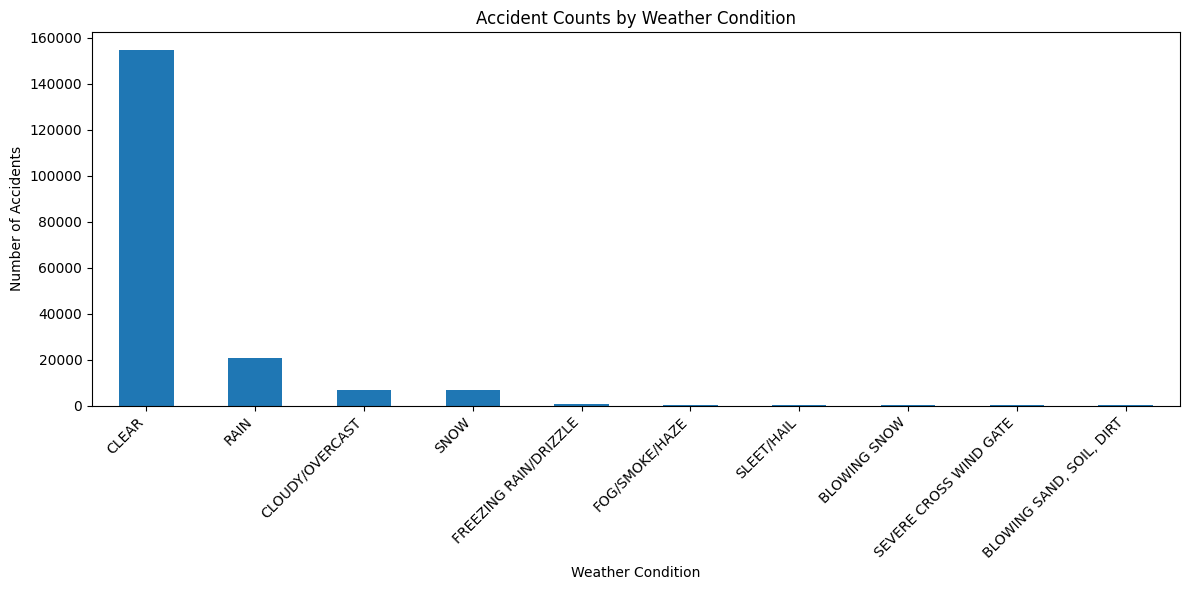

In [33]:
#Visualize accident counts by weather condition
import matplotlib.pyplot as plt

weather_counts = df['weather_condition'].value_counts()

plt.figure(figsize=(12, 6))
weather_counts.plot(kind='bar')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.title('Accident Counts by Weather Condition')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

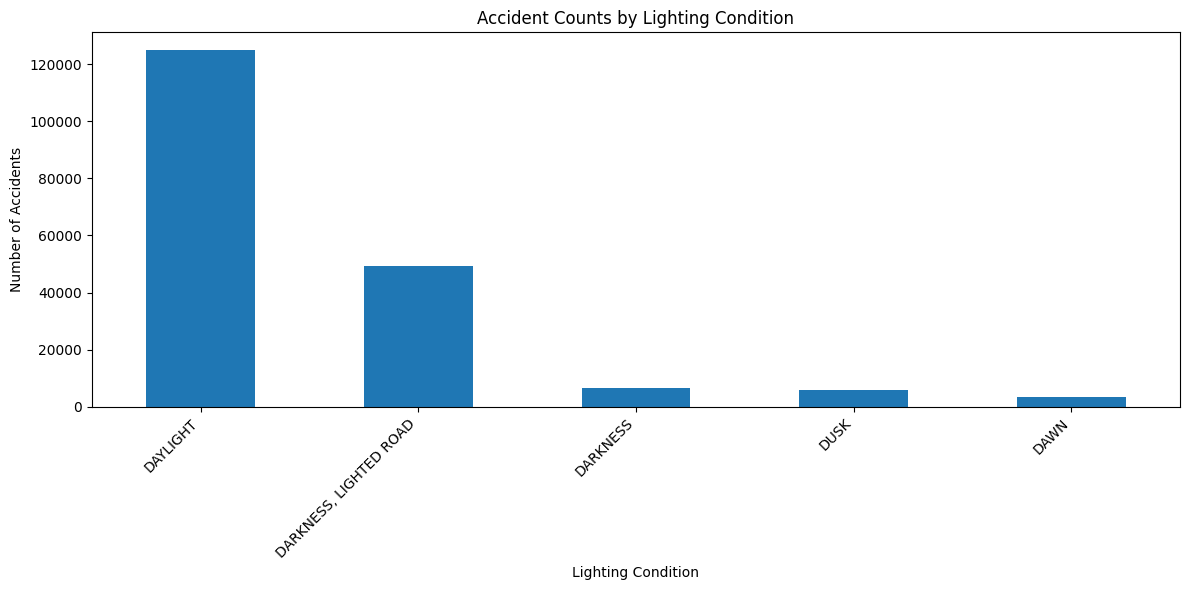

In [9]:
#Visualize accident counts by lighting condition
lighting_counts = df['lighting_condition'].value_counts()
plt.figure(figsize=(12, 6))
lighting_counts.plot(kind='bar')
plt.xlabel('Lighting Condition')
plt.ylabel('Number of Accidents')
plt.title('Accident Counts by Lighting Condition')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

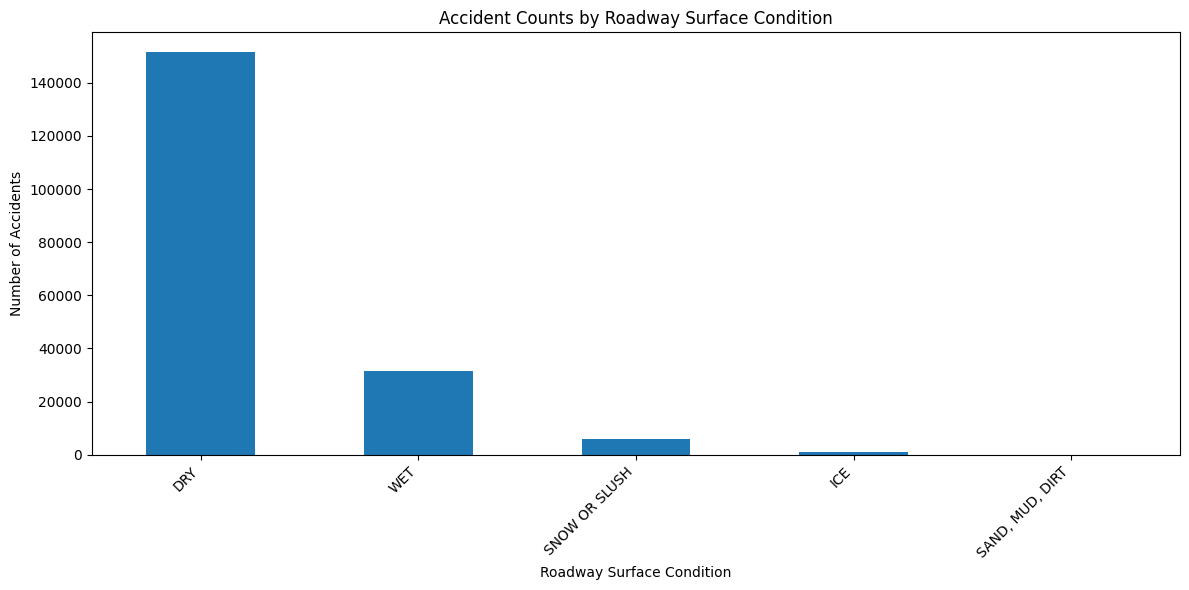

In [11]:
#Visualize accident counts by roadway surface condition
roadway_surface_counts = df['roadway_surface_cond'].value_counts()
plt.figure(figsize=(12, 6))
roadway_surface_counts.plot(kind='bar')
plt.xlabel('Roadway Surface Condition')
plt.ylabel('Number of Accidents')
plt.title('Accident Counts by Roadway Surface Condition')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

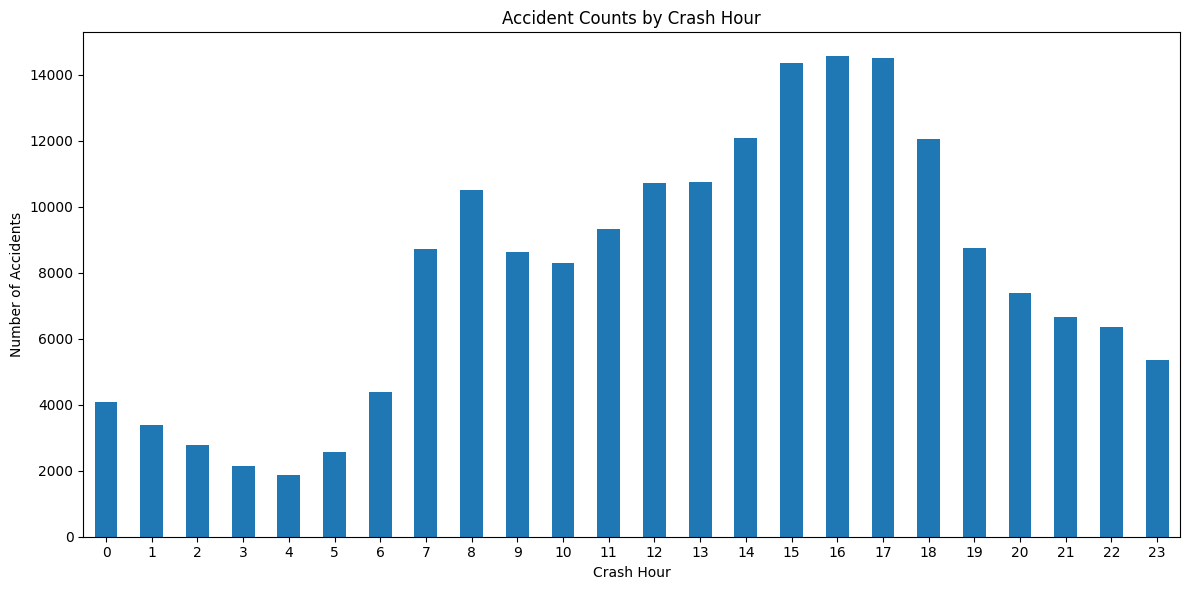

In [13]:
#Visualize accident counts by crash hour
crash_hour_counts = df['crash_hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
crash_hour_counts.plot(kind='bar')
plt.xlabel('Crash Hour')
plt.ylabel('Number of Accidents')
plt.title('Accident Counts by Crash Hour')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

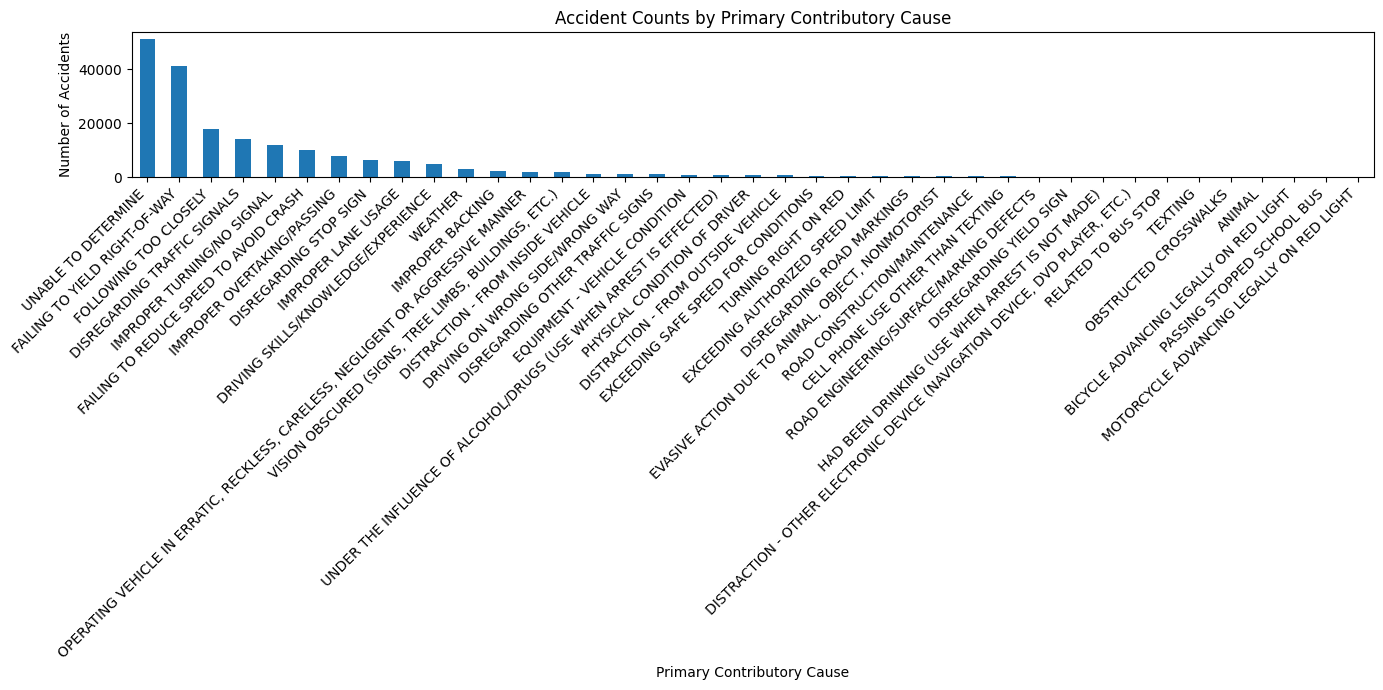

In [15]:
#Visualize accident counts by primary contributory cause
import matplotlib.pyplot as plt

prim_cause_counts = df['prim_contributory_cause'].value_counts()

plt.figure(figsize=(14, 7))
prim_cause_counts.plot(kind='bar')
plt.xlabel('Primary Contributory Cause')
plt.ylabel('Number of Accidents')
plt.title('Accident Counts by Primary Contributory Cause')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

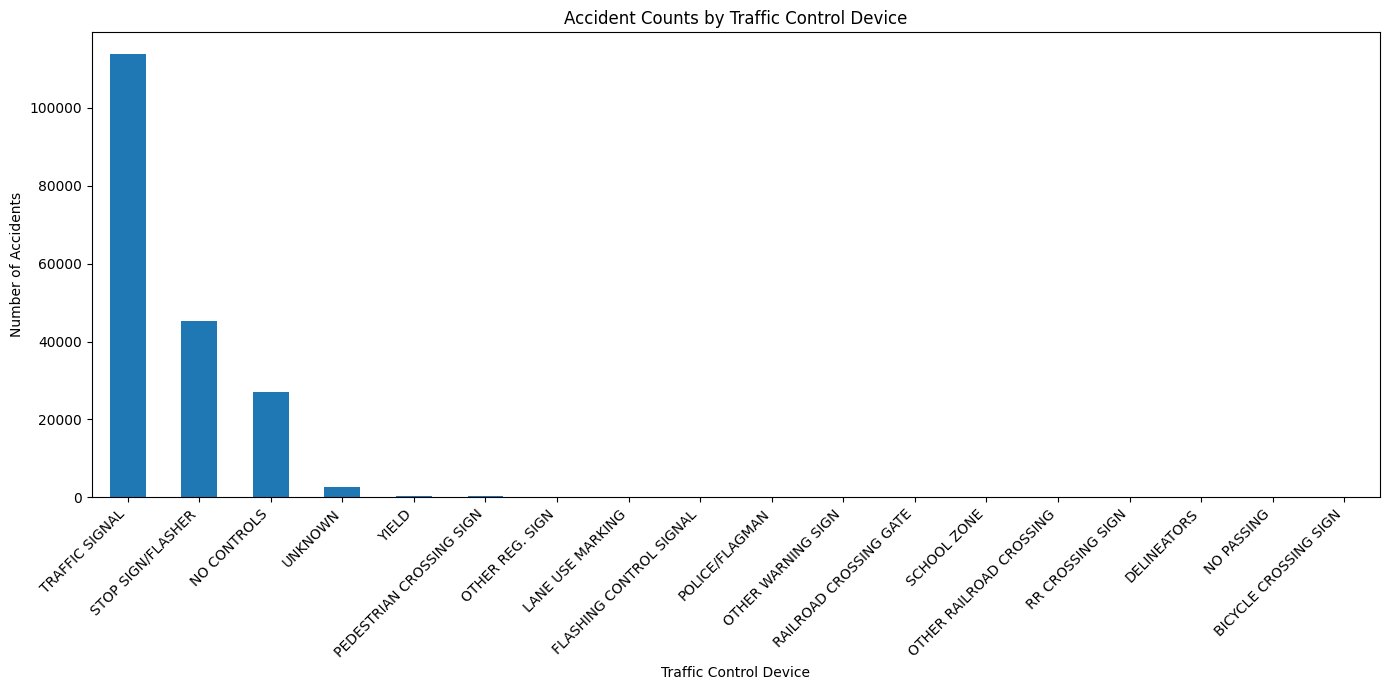

In [17]:
#Visualize accident counts by traffic control device
traffic_control_counts = df['traffic_control_device'].value_counts()
plt.figure(figsize=(14, 7))
traffic_control_counts.plot(kind='bar')
plt.xlabel('Traffic Control Device')
plt.ylabel('Number of Accidents')
plt.title('Accident Counts by Traffic Control Device')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [26]:
#Analyze accident severity by weather condition
injury_cols = ['injuries_total', 'injuries_fatal', 'injuries_incapacitating', 'injuries_non_incapacitating', 'injuries_reported_not_evident', 'injuries_no_indication']
severity_by_weather = df.groupby('weather_condition')[injury_cols].mean()
display(severity_by_weather)

most_severe_injury_by_weather = df.groupby('weather_condition')['most_severe_injury'].value_counts(normalize=True).unstack()
display(most_severe_injury_by_weather)

,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication
weather_condition,,,,,,
"BLOWING SAND, SOIL, DIRT",0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
BLOWING SNOW,0.333333,0.000000,0.042735,0.153846,0.136752,2.307692
CLEAR,0.396896,0.002012,0.040491,0.230246,0.124146,2.253164
CLOUDY/OVERCAST,0.378779,0.001890,0.034012,0.211483,0.131395,2.273110
FOG/SMOKE/HAZE,0.449541,0.003058,0.015291,0.238532,0.192661,2.180428
FREEZING RAIN/DRIZZLE,0.472165,0.002062,0.037113,0.309278,0.123711,2.090722
RAIN,0.413144,0.001774,0.037149,0.242259,0.131962,2.247388
SEVERE CROSS WIND GATE,0.259259,0.037037,0.037037,0.111111,0.074074,1.925926
SLEET/HAIL,0.465347,0.000000,0.042904,0.260726,0.161716,2.115512


most_severe_injury,FATAL,INCAPACITATING INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT"
weather_condition,,,,,
"BLOWING SAND, SOIL, DIRT",NaN,NaN,1.000000,NaN,NaN
BLOWING SNOW,NaN,0.034188,0.786325,0.111111,0.068376
CLEAR,0.001818,0.033128,0.733184,0.154945,0.076926
CLOUDY/OVERCAST,0.001890,0.028634,0.733140,0.152035,0.084302
FOG/SMOKE/HAZE,0.003058,0.015291,0.700306,0.180428,0.100917
FREEZING RAIN/DRIZZLE,0.002062,0.024742,0.682474,0.200000,0.090722
RAIN,0.001582,0.031013,0.715176,0.166091,0.086137
SEVERE CROSS WIND GATE,0.037037,NaN,0.851852,0.111111,NaN
SLEET/HAIL,NaN,0.036304,0.676568,0.178218,0.108911


Accident Counts by Day of the Week:


,count
crash_day_of_week,
6,31351
5,28053
7,27805
3,27408
4,27300
2,25394
1,22867



Mean Injury Counts by Day of the Week:


,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication
crash_day_of_week,,,,,,
1,0.467398,0.002711,0.050247,0.278742,0.135698,2.368610
2,0.392849,0.001615,0.039773,0.222297,0.129164,2.204812
3,0.375328,0.001386,0.036522,0.215521,0.121899,2.199139
4,0.386960,0.002271,0.037802,0.224542,0.122344,2.193260
5,0.376430,0.001996,0.034470,0.216911,0.123053,2.205825
6,0.369015,0.001435,0.036139,0.213677,0.117763,2.247584
7,0.415321,0.002266,0.042187,0.242402,0.128466,2.358497


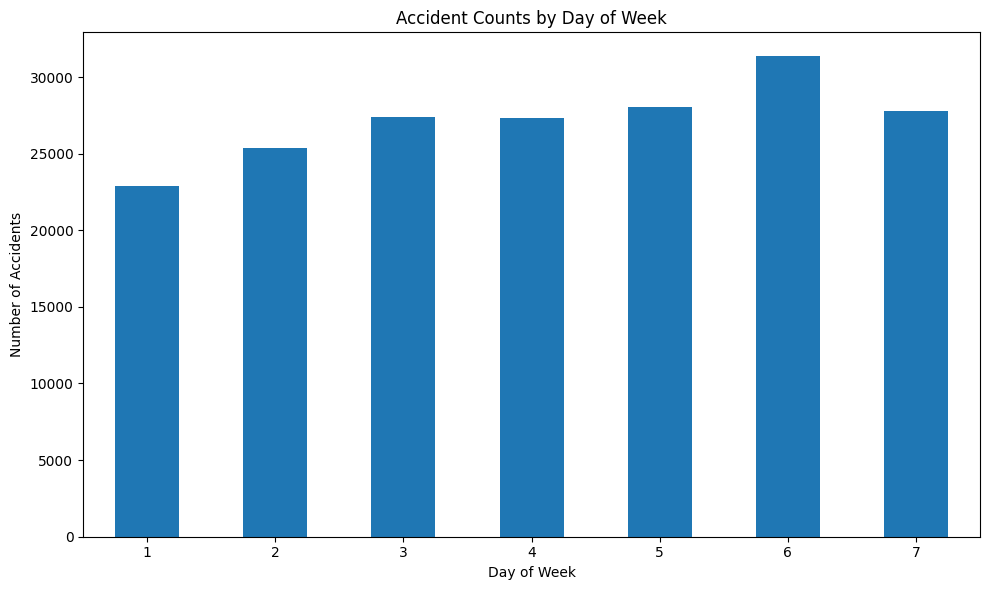

In [28]:
#Analyze accident patterns by time and day

accident_counts_by_day = df['crash_day_of_week'].value_counts()
print("Accident Counts by Day of the Week:")
display(accident_counts_by_day)

injury_cols = ['injuries_total', 'injuries_fatal', 'injuries_incapacitating', 'injuries_non_incapacitating', 'injuries_reported_not_evident', 'injuries_no_indication']
severity_by_day = df.groupby('crash_day_of_week')[injury_cols].mean()
print("\nMean Injury Counts by Day of the Week:")
display(severity_by_day)

plt.figure(figsize=(10, 6))
accident_counts_by_day.sort_index().plot(kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.title('Accident Counts by Day of Week')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [30]:
#Analyze primary contributory causes under certain conditions
weather_cause_counts = df.groupby(['weather_condition', 'prim_contributory_cause']).size().unstack(fill_value=0)
lighting_cause_counts = df.groupby(['lighting_condition', 'prim_contributory_cause']).size().unstack(fill_value=0)
roadway_cause_counts = df.groupby(['roadway_surface_cond', 'prim_contributory_cause']).size().unstack(fill_value=0)

print("Top 5 Primary Contributory Causes in RAIN Weather:")
display(weather_cause_counts.loc['RAIN'].sort_values(ascending=False).head(5))

print("\nTop 5 Primary Contributory Causes in DARKNESS Lighting:")
display(lighting_cause_counts.loc['DARKNESS'].sort_values(ascending=False).head(5))

print("\nTop 5 Primary Contributory Causes on WET Roadway Surface:")
display(roadway_cause_counts.loc['WET'].sort_values(ascending=False).head(5))

Top 5 Primary Contributory Causes in RAIN Weather:


,RAIN
prim_contributory_cause,
UNABLE TO DETERMINE,5398
FAILING TO YIELD RIGHT-OF-WAY,4614
FOLLOWING TOO CLOSELY,1847
DISREGARDING TRAFFIC SIGNALS,1461
WEATHER,1277



Top 5 Primary Contributory Causes in DARKNESS Lighting:


,DARKNESS
prim_contributory_cause,
UNABLE TO DETERMINE,2040
FAILING TO YIELD RIGHT-OF-WAY,1216
FOLLOWING TOO CLOSELY,559
DISREGARDING TRAFFIC SIGNALS,498
IMPROPER TURNING/NO SIGNAL,376



Top 5 Primary Contributory Causes on WET Roadway Surface:


,WET
prim_contributory_cause,
UNABLE TO DETERMINE,8119
FAILING TO YIELD RIGHT-OF-WAY,7119
FOLLOWING TOO CLOSELY,2826
DISREGARDING TRAFFIC SIGNALS,2378
FAILING TO REDUCE SPEED TO AVOID CRASH,1886


In [32]:
#Analyze accident counts by traffic control device
traffic_control_counts = df['traffic_control_device'].value_counts()

severe_accidents = df[(df['injuries_fatal'] > 0) | (df['injuries_incapacitating'] > 0)]
severe_traffic_control_counts = severe_accidents['traffic_control_device'].value_counts()

proportion_severe = severe_traffic_control_counts / traffic_control_counts

results_df = pd.DataFrame({
    'Total Accidents': traffic_control_counts,
    'Severe Accidents': severe_traffic_control_counts,
    'Proportion of Severe Accidents': proportion_severe
}).fillna(0)

display(results_df)

,Total Accidents,Severe Accidents,Proportion of Severe Accidents
traffic_control_device,,,
BICYCLE CROSSING SIGN,9,1.0,0.111111
DELINEATORS,13,0.0,0.000000
FLASHING CONTROL SIGNAL,134,8.0,0.059701
LANE USE MARKING,139,10.0,0.071942
NO CONTROLS,27071,927.0,0.034243
NO PASSING,12,2.0,0.166667
OTHER RAILROAD CROSSING,22,1.0,0.045455
OTHER REG. SIGN,170,9.0,0.052941
OTHER WARNING SIGN,87,5.0,0.057471


## Summary:

### Data Analysis Key Findings

*   The analysis visualized accident counts based on various factors:
    *   Weather condition
    *   Lighting condition
    *   Roadway surface condition
    *   Crash Hour of the day
    *   Primary contributory cause
    *   Traffic control device
*   An attempt to visualize accident hotspots using latitude and longitude data was unsuccessful because the required columns were not found in the dataset.
*   Day '6' (likely Saturday) had the highest number of accidents, while day '1' (likely Sunday) had the lowest count but the highest mean total and fatal injuries.
*   In rainy weather, dark lighting, and wet roadway surface conditions, "UNABLE TO DETERMINE" and "FAILING TO YIELD RIGHT-OF-WAY" were consistently among the top primary contributory causes.
*   "WEATHER" as a contributory cause was prominent only in rainy weather.
*   "IMPROPER TURNING/NO SIGNAL" was a top cause in dark lighting, while "FAILING TO REDUCE SPEED TO AVOID CRASH" was a top cause on a wet roadway surface.
*   "TRAFFIC SIGNAL" and "STOP SIGN/FLASHER" had the highest total accident counts among traffic control devices.
*   "NO PASSING", "SCHOOL ZONE", and "PEDESTRIAN CROSSING SIGN" showed relatively higher proportions of severe accidents compared to high-volume devices like "TRAFFIC SIGNAL" and "STOP SIGN/FLASHER".

### Insights or Next Steps

*   Further analysis should focus on identifying the specific weather, lighting, and roadway conditions, as well as primary causes and traffic control devices, that are associated with the highest number of accidents.
*   To visualize accident hotspots, obtain a dataset that includes latitude and longitude coordinates for each accident.

*   Further investigation into the "UNABLE TO DETERMINE" primary contributory cause is needed to improve accident reporting accuracy and identify underlying factors.
*   Targeted safety campaigns and enforcement could be implemented for specific traffic control devices like "NO PASSING", "SCHOOL ZONE", and "PEDESTRIAN CROSSING SIGN" due to their higher proportion of severe accidents.
